<b>Basic Computer Vision</b>

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

<b>Dataset</b>

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


<b>Image preprocessing</b>
- Pixel Normalization

In [5]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # a number between 0 and 1
  return images, labels

The map function applies the normalize function to each element in the train
and test datasets

In [6]:
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

The first time you use the dataset, the images will be loaded from disk
Caching will keep them in memory, making training faster

In [7]:
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

<b>Data Sample</b>

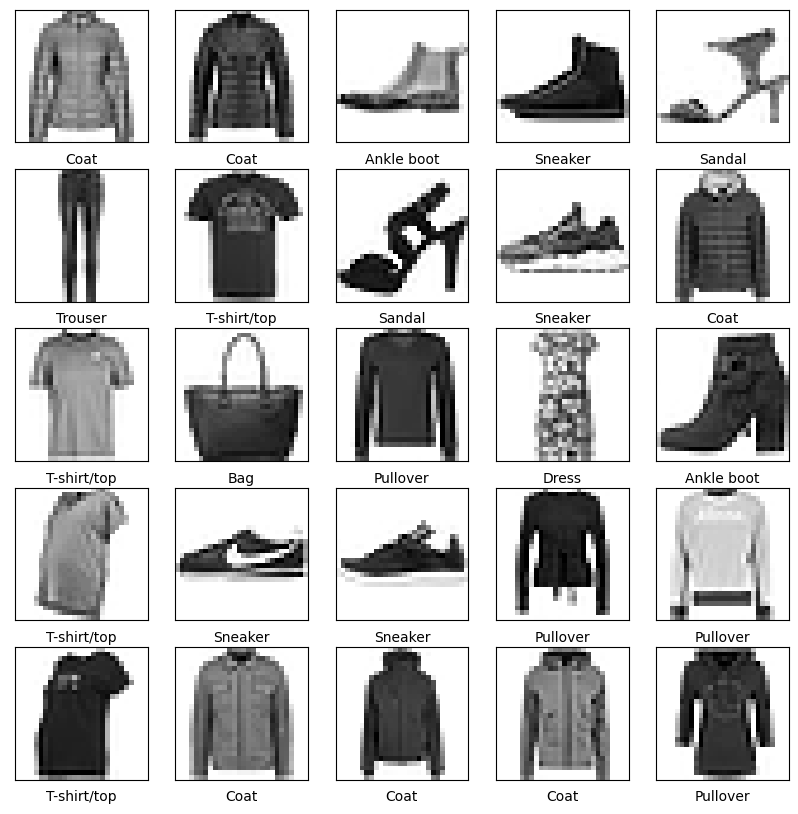

In [8]:
plt.figure(figsize=(10,10))
i = 0
for(image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+= 1
plt.show()


#### Using desne Layers

<b>Model</b>

Building

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Model Compiling

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model training

- repeat the dataset should iterate forever, until fit ephochs parameter to the fit method is done.
- shuffle randomizes the order
- batch groups 32 examples when doing the training, this significantly speeds up the traiing process.

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4938 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3719 - accuracy: 0.8664
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8923


Model testing

In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print(test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3894 - accuracy: 0.8609
0.8608999848365784


Predictions

In [14]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 95ms/step


In [15]:
predictions.shape

(32, 10)

In [16]:
predictions[0]

array([5.1542891e-05, 6.4511187e-05, 1.7054709e-02, 7.6716287e-06,
       9.6568400e-01, 6.5549139e-09, 1.7127436e-02, 2.0354962e-09,
       1.0043243e-05, 6.9152037e-08], dtype=float32)

class number 5 was the hihgest almost 75 confidence

In [17]:
np.argmax(predictions[0])

4

In [18]:
print(test_labels[4])
print(class_names[4])

5
Coat


Plotting the confidence levels

In [19]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

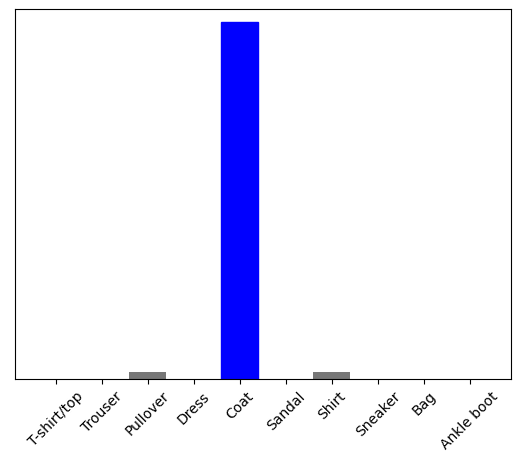

In [20]:
plot_value_array(0, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#### Using Convolutional NN

Model building

In [22]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding ='same', activation=tf.nn.relu, input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding ='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Model Compiling

In [23]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model Training

In [25]:
model1.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10


1875/1875 [==============================] - 72s 36ms/step - loss: 0.3982 - accuracy: 0.8575
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2589 - accuracy: 0.9062
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2147 - accuracy: 0.9199
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1826 - accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1577 - accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1315 - accuracy: 0.9507
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1128 - accuracy: 0.9586
Epoch 8/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0923 - accuracy: 0.9655
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0762 - accuracy: 0.9720
Epoch 10/10
1875/1875 [==============================] - 53s 28ms/step - lo

Model Testing

In [26]:
test_loss_1, test_accuracy = model1.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 5s 14ms/step - loss: 0.3031 - accuracy: 0.9186


- Acheieved a higher accuracy at training so it might be memorizing and lower accuracy at testing. bias-variance trade off